In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy
import pickle

# We import the model, stimuli, and the optimal control package
from neurolib.models.aln import ALNModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.control.optimal_control import oc_aln

import matplotlib as mpl
label_size= 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['font.size'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size
mpl.rcParams['lines.linewidth'] = 1

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

while "Promotion/neurolib" in os.getcwd():
    os.chdir('..')

pickledir = os.path.join(os.getcwd(), "neurolib_aln_osc_datastorage/optimal_control/WP2/2n")
dir = os.path.join(pickledir, "images_2n_aln_w1D")

print(dir)

# This function reads out the final state of a simulation
def getfinalstate(model):
    N = model.params.Cmat.shape[0]
    V = len(model.state_vars)
    T = model.getMaxDelay() + 1
    state = np.zeros((N, V, T))
    for v in range(V):
        if "rates" in model.state_vars[v] or "IA" in model.state_vars[v]:
            for n in range(N):
                state[n, v, :] = model.state[model.state_vars[v]][n, -T:]
        else:
            for n in range(N):
                state[n, v, :] = model.state[model.state_vars[v]][n]
    return state


def setinitstate(model, state):
    N = model.params.Cmat.shape[0]
    V = len(model.init_vars)
    T = model.getMaxDelay() + 1


    for v in range(V):
        if "rates" in model.init_vars[v] or "IA" in model.init_vars[v]:
            model.params[model.init_vars[v]] = np.zeros((N, T))
            for n in range(N):
                model.params[model.init_vars[v]][n,:] = state[n, v, -T:]
        else:
            model.params[model.init_vars[v]] = np.zeros((N))
            for n in range(N):
                model.params[model.init_vars[v]][n] = state[n, v, -1]

    return

def getstate(model):
    state = np.concatenate(  ( np.concatenate((model.params["rates_exc_init"][:, np.newaxis, -1],
                                            model.params["rates_inh_init"][:, np.newaxis, -1],
                                            model.params["IA_init"][:, np.newaxis, -1], ), axis=1, )[:, :, np.newaxis],
                            np.stack((model.rates_exc, model.rates_inh, model.IA), axis=1),),axis=2,  )
    
    return state

def get_period(timeseries, dt):
    peaks = scipy.signal.find_peaks(timeseries)[0]
    periods = []
    for i in range(4, len(peaks)-1):
        periods.append( (peaks[i] - peaks[i-1]) * dt)
    return np.mean(periods)

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

/home/lena/Promotion/neurolib_aln_osc_datastorage/optimal_control/WP2/2n/images_2n_aln_w1D


In [2]:
data = dict()
p_names = ["A", "B", "C", "D", "E", "F"]
coords = [[0., 0.7, "A"], [1., 1.5, "B"], [2., 0.8, "C"], [2.5, 1.8, "D"], [1.0, 0.7, "E"],[1.4, 1.2, "F"]]
coupling_array = [0.1, 0.3, 0.9]
delay_array = [0., 15., 30., 45.]

cmats = []
cmats.append(np.array( [[0., 0.], [1., 0.]] ))
cmats.append(np.array( [[0., 1.], [1., 0.]] ))

for i in range(len(p_names)):
    p = p_names[i]
    data[p] = dict()
    data[p]["coordinates"] = coords[i]
    if i in [0,1,2,3]:
        data[p]["target_period"] = 10.
    elif i in [4,5]:
        data[p]["target_period"] = 50.
    data[p]["control"] = [[[None for x in range(len(coupling_array))] for y in range(len(delay_array))] for z in range(len(cmats)) ]
    data[p]["state"] = [[[None for x in range(len(coupling_array))] for y in range(len(delay_array))] for z in range(len(cmats)) ]
    data[p]["init_state"] = [[[None for x in range(len(coupling_array))] for y in range(len(delay_array))] for z in range(len(cmats)) ]

N = 2

for i in range(len(cmats)):

    for pi in range(len(p_names)):

        for di in range(len(delay_array)):

            for ci in range(len(coupling_array)):

                print(i, pi, di, ci)

                model = ALNModel(Cmat=cmats[i], Dmat=delay_array[di]*cmats[i])

                dt = model.params['dt']
                model.params['duration'] = 20. * 1000 # Simulation time, ms
                model.params.mue_ext_mean = data[p_names[pi]]["coordinates"][0]
                model.params.mui_ext_mean = data[p_names[pi]]["coordinates"][1]
                model.params.c_gl = coupling_array[ci]
                model.params.signalV = 1.

                model.run()

                #for n in range(N):
                #    plt.plot(model.t[-1000:], model.rates_exc[n,-1000:])
                #plt.show()

                data[p_names[pi]]["init_state"][i][di][ci] = getfinalstate(model)

                if i in [4,5]:
                    data[p]["target_period"] = get_period(model.rates_exc[0,:], dt)

0 0 0 0
0 0 0 1
0 0 0 2
0 0 1 0
0 0 1 1
0 0 1 2
0 0 2 0
0 0 2 1
0 0 2 2
0 0 3 0
0 0 3 1
0 0 3 2
0 1 0 0
0 1 0 1
0 1 0 2
0 1 1 0
0 1 1 1
0 1 1 2
0 1 2 0
0 1 2 1
0 1 2 2
0 1 3 0
0 1 3 1
0 1 3 2
0 2 0 0
0 2 0 1
0 2 0 2
0 2 1 0
0 2 1 1
0 2 1 2
0 2 2 0
0 2 2 1
0 2 2 2
0 2 3 0
0 2 3 1
0 2 3 2
0 3 0 0
0 3 0 1
0 3 0 2
0 3 1 0
0 3 1 1
0 3 1 2
0 3 2 0
0 3 2 1
0 3 2 2
0 3 3 0
0 3 3 1
0 3 3 2
0 4 0 0
0 4 0 1
0 4 0 2
0 4 1 0
0 4 1 1
0 4 1 2
0 4 2 0
0 4 2 1
0 4 2 2
0 4 3 0
0 4 3 1
0 4 3 2
0 5 0 0
0 5 0 1
0 5 0 2
0 5 1 0
0 5 1 1
0 5 1 2
0 5 2 0
0 5 2 1
0 5 2 2
0 5 3 0
0 5 3 1
0 5 3 2
1 0 0 0
1 0 0 1
1 0 0 2
1 0 1 0
1 0 1 1
1 0 1 2
1 0 2 0
1 0 2 1
1 0 2 2
1 0 3 0
1 0 3 1
1 0 3 2
1 1 0 0
1 1 0 1
1 1 0 2
1 1 1 0
1 1 1 1
1 1 1 2
1 1 2 0
1 1 2 1
1 1 2 2
1 1 3 0
1 1 3 1
1 1 3 2
1 2 0 0
1 2 0 1
1 2 0 2
1 2 1 0
1 2 1 1
1 2 1 2
1 2 2 0
1 2 2 1
1 2 2 2
1 2 3 0
1 2 3 1
1 2 3 2
1 3 0 0
1 3 0 1
1 3 0 2
1 3 1 0
1 3 1 1
1 3 1 2
1 3 2 0
1 3 2 1
1 3 2 2
1 3 3 0
1 3 3 1
1 3 3 2
1 4 0 0
1 4 0 1
1 4 0 2
1 4 1 0
1 4 1 1


In [3]:
controlmat = np.zeros((N,len(model.input_vars)))
controlmat[:,0] = 1.

costmat = np.zeros((N, len(model.output_vars)))
costmat[:,0] = 1.

it = 10
maxstr = 5
pr = np.arange(0,101,20)

In [22]:
for i in range(len(cmats)):
    print("cmat i = ", i)

    if i not in [0]: continue

    for pi in range(len(p_names)):

        p = data[p_names[pi]]["coordinates"]
        print("pind = ", pi, p_names[pi], p)

        if pi not in [3]: continue

        for di in range(len(delay_array)):

            for ci in range(len(coupling_array)):

                print(i, di)

                #if di not in [1]: continue
                #if ci not in [1]: continue

                print("----------------------", di, ci)

                target_period = data[p_names[pi]]["target_period"]

                model = ALNModel(Cmat=cmats[i], Dmat=delay_array[di] * cmats[i])
                model.params.mue_ext_mean = data[p_names[pi]]["coordinates"][0]
                model.params.mui_ext_mean = data[p_names[pi]]["coordinates"][1]
                model.params.c_gl = coupling_array[ci]
                model.params.signalV = 1.

                nmaxdelay = model.getMaxDelay()
                print("target period, max delay = ", target_period, nmaxdelay)

                setinitstate(model, data[p_names[pi]]["init_state"][i][di][ci])

                duration = 100.
                if pi in [4,5]:
                    duration = 600.

                zero_input0 = ZeroInput().generate_input(duration=duration+model.params.dt, dt=model.params.dt)
                zero_input = np.vstack( ([zero_input0]*4) )[np.newaxis,:,:]
                zero_control = np.vstack( ([zero_input]*N))
                    
                model.params.duration = duration
                model.params["ext_exc_current"] = zero_control[:,0,:]
                model.params["ext_inh_current"] = zero_control[:,1,:]
                model.params["ext_exc_rate"] = zero_control[:,2,:]
                model.params["ext_inh_rate"] = zero_control[:,3,:]
                model.run()

                int0 = 200
                int1 = int0 + int(target_period/dt)*6

                if pi in [4,5]:
                    int0 = 800
                    int1 = int0 + int(target_period/dt)*8

                model_controlled = oc_aln.OcAln(model, target_period, print_array=pr, cost_interval=(int0,None), control_interval=(int0, int1), cost_matrix=costmat, control_matrix=controlmat)
                model_controlled.channelwise_optimization = True
                model_controlled.weights["w_p"] = 0.

                if pi in [0,1,2,3]:
                    model_controlled.weights["w_f_sync"] = 1.
                    if pi in [0]:
                        model_controlled.weights["w_1D"] = 0.2
                    if pi in [0,1]:
                        model_controlled.weights["w_1D"] = 0.4
                    else:
                        model_controlled.weights["w_1D"] = 24. * 1e-1
                elif pi in [5]:
                    model_controlled.weights["w_cc"] = 1.
                    model_controlled.weights["w_1D"] = 1.
                elif pi in [4]:
                    model_controlled.weights["w_cc"] = 1.
                    model_controlled.weights["w_1D"] = 1.0


                model_controlled.maximum_control_strength = maxstr

                if False:
                    if type(data[p_names[pi]]["control"][i][di][ci]) != type(None):
                        model_controlled.control = data[p_names[pi]]["control"][i][di][ci].copy()
                        model_controlled.update_input()

                #model_controlled.step = 1e-2
                #model_controlled.optimize(1)

                if True and pi in [0,1]:
                    if type(data[p_names[pi]]["control"][i][di][ci]) != type(None):
                        sine_input = ZeroInput().generate_input(duration=duration+model.params.dt, dt=model.params.dt)
                        sine_input[0,int0:int1] = 2.0 * (1. + np.sin(2. * np.pi * np.arange(-0.25*target_period, 5.75*target_period, dt)/target_period))
                        model_controlled.control[0,0,:] = sine_input.copy()
                        model_controlled.control[1,0,:] = sine_input.copy()
                        model_controlled.update_input()     
                        model_controlled.model.run()

                if True:
                    for l in range(1):
                        for k in np.arange(-5,2,2):
                            model_controlled.zero_step_encountered = False
                            model_controlled.step = 10.**(k)
                            model_controlled.optimize(it)
                
                data[p_names[pi]]["control"][i][di][ci] = model_controlled.control.copy()
                data[p_names[pi]]["state"][i][di][ci] = model_controlled.get_xs()

                if False:
                    plt.plot(model_controlled.model.t, model_controlled.get_xs()[0,0,1:])
                    plt.plot(model_controlled.model.t, model_controlled.get_xs()[1,0,1:])
                    plt.show()

                    plt.plot(model_controlled.model.t, model_controlled.control[0,0,1:])
                    plt.plot(model_controlled.model.t, model_controlled.control[1,0,1:])
                    plt.show()

            with open(os.path.join(pickledir, 'osc_2n_aln_w1D.pickle'), 'wb') as f:
                pickle.dump(data, f)

cmat i =  0
pind =  0 A [0.0, 0.7, 'A']
pind =  1 B [1.0, 1.5, 'B']
pind =  2 C [2.0, 0.8, 'C']
pind =  3 D [2.5, 1.8, 'D']
0 0
---------------------- 0 0
target period, max delay =  10.0 40
Optimal control with target oscillation period
Compute control for a deterministic system
Cost in iteration 0: -2.1705685594472278e-14
Converged in iteration 3 with cost -0.0001592163086989998
Final cost : -0.0001592163086989998
Compute control for a deterministic system
Cost in iteration 0: -0.0001592163086989998
Converged in iteration 2 with cost -0.008534879136577182
Final cost : -0.008534879136577182
Compute control for a deterministic system
Cost in iteration 0: -0.008534879136577182
Converged in iteration 2 with cost -0.8636074918095995
Final cost : -0.8636074918095995
Compute control for a deterministic system
Cost in iteration 0: -0.8636074918095995
Converged in iteration 3 with cost -11.769904945947673
Final cost : -11.769904945947673
0 0
---------------------- 0 1
target period, max delay

coupling  0


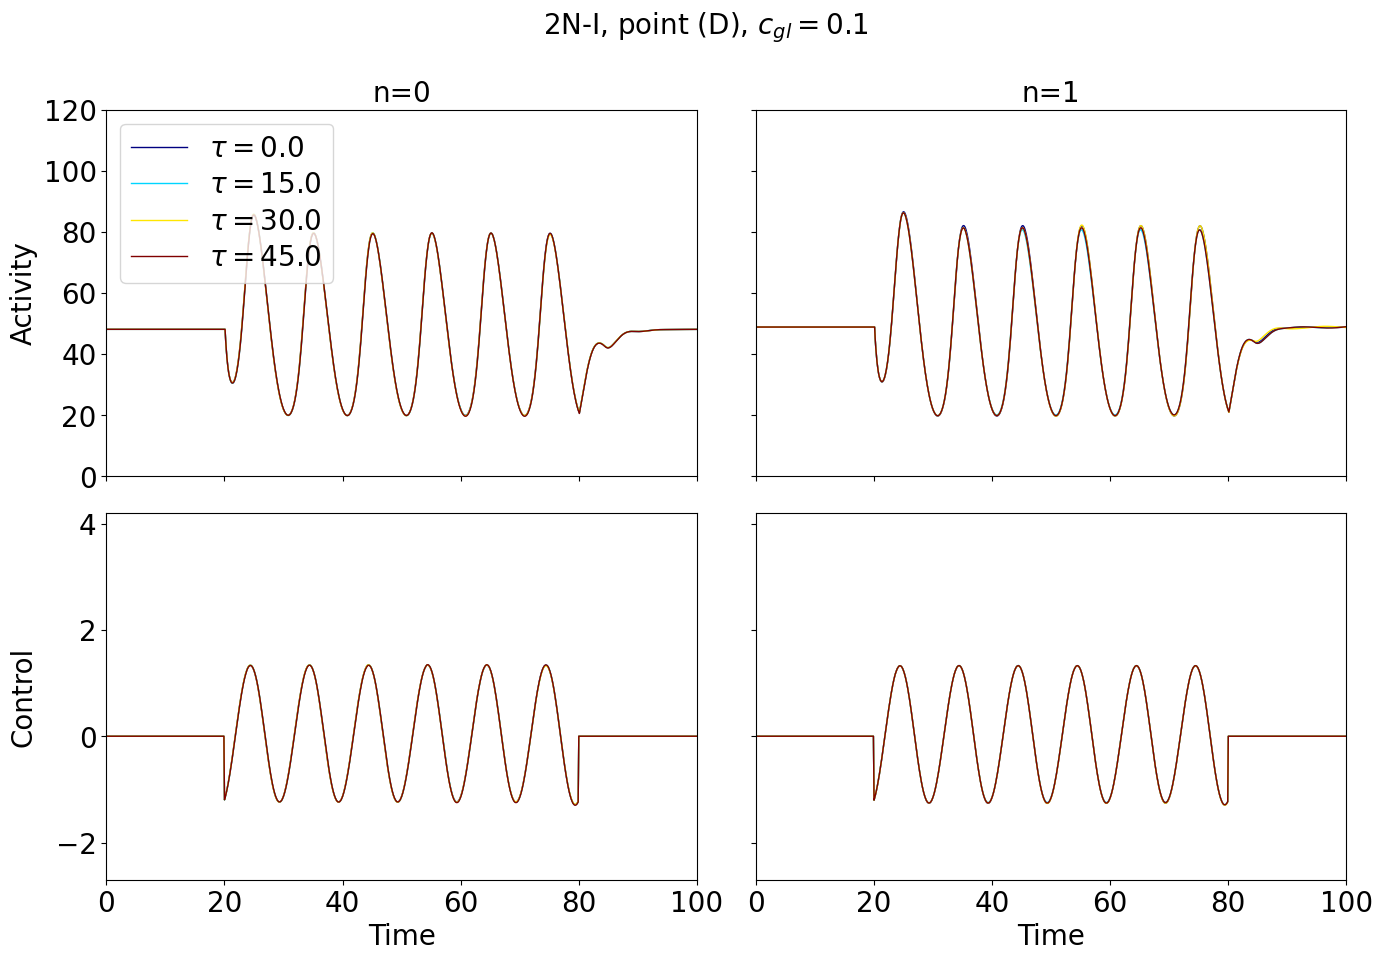

coupling  1


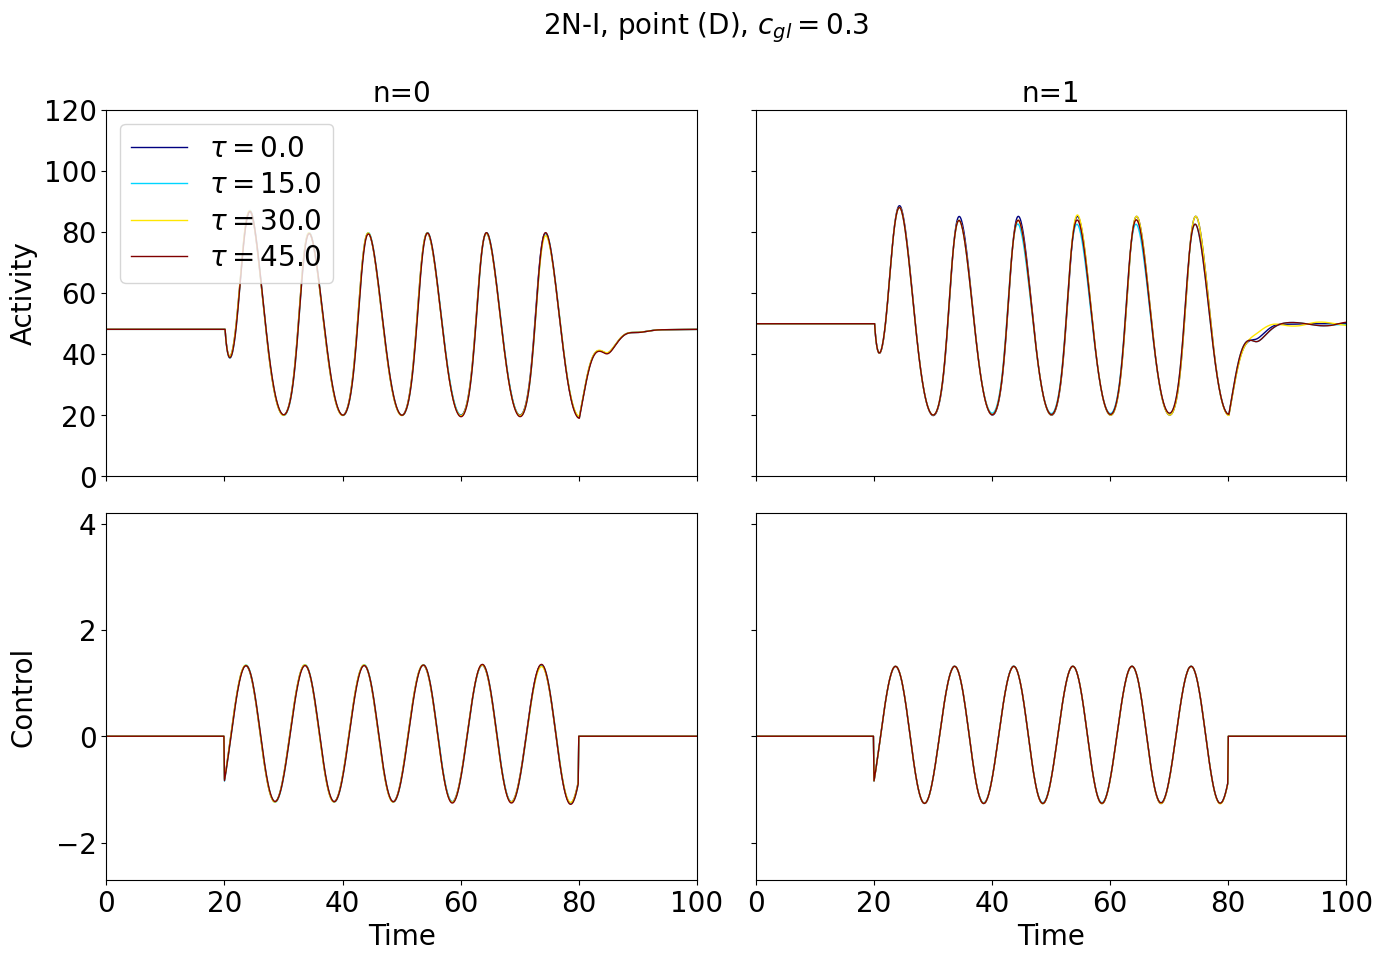

coupling  2


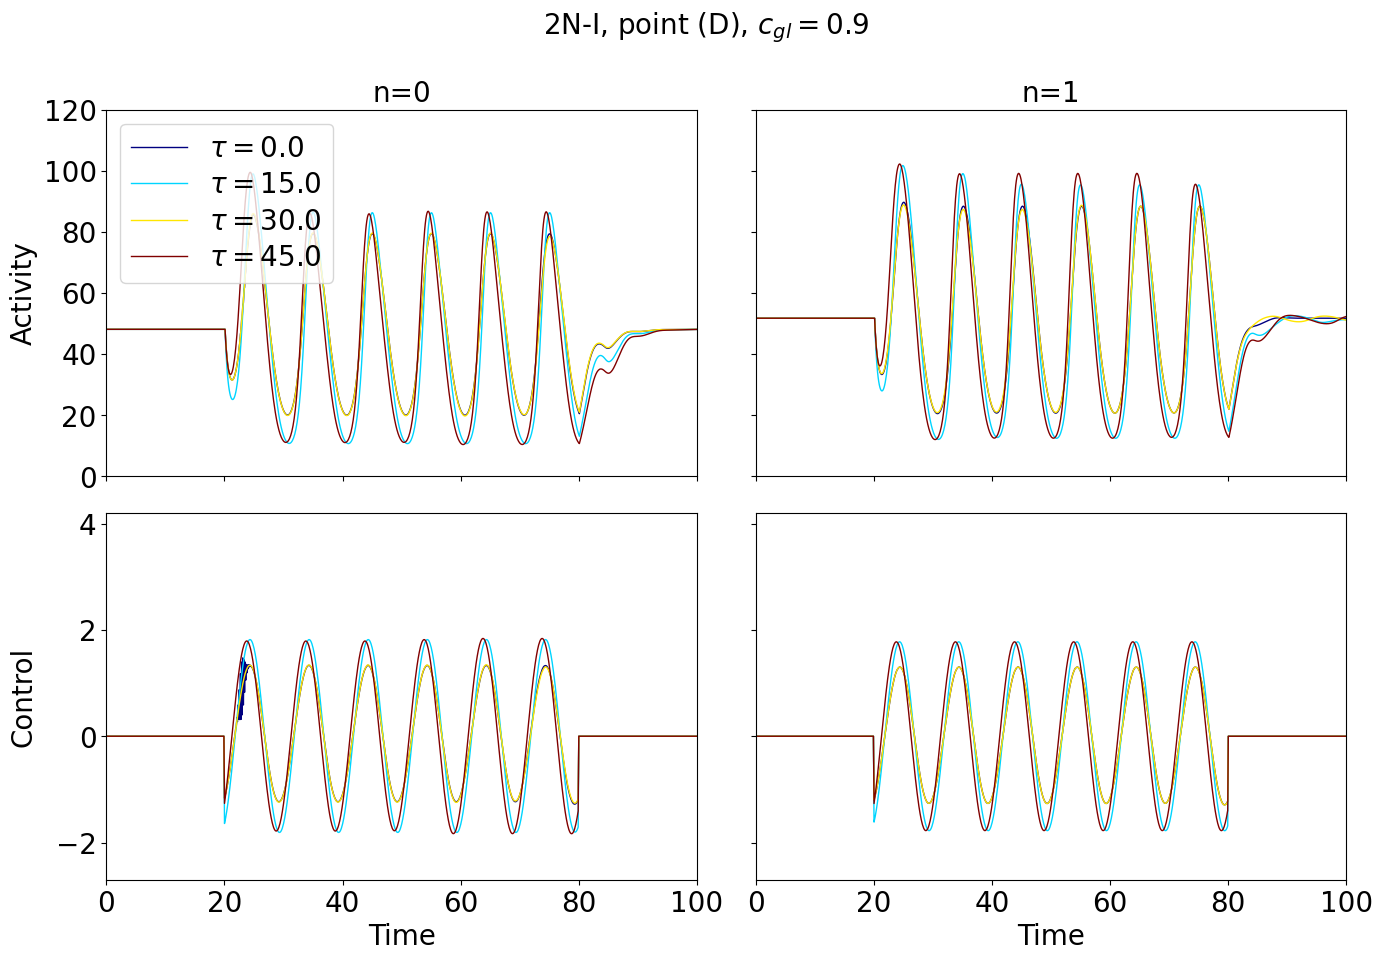

delay  0


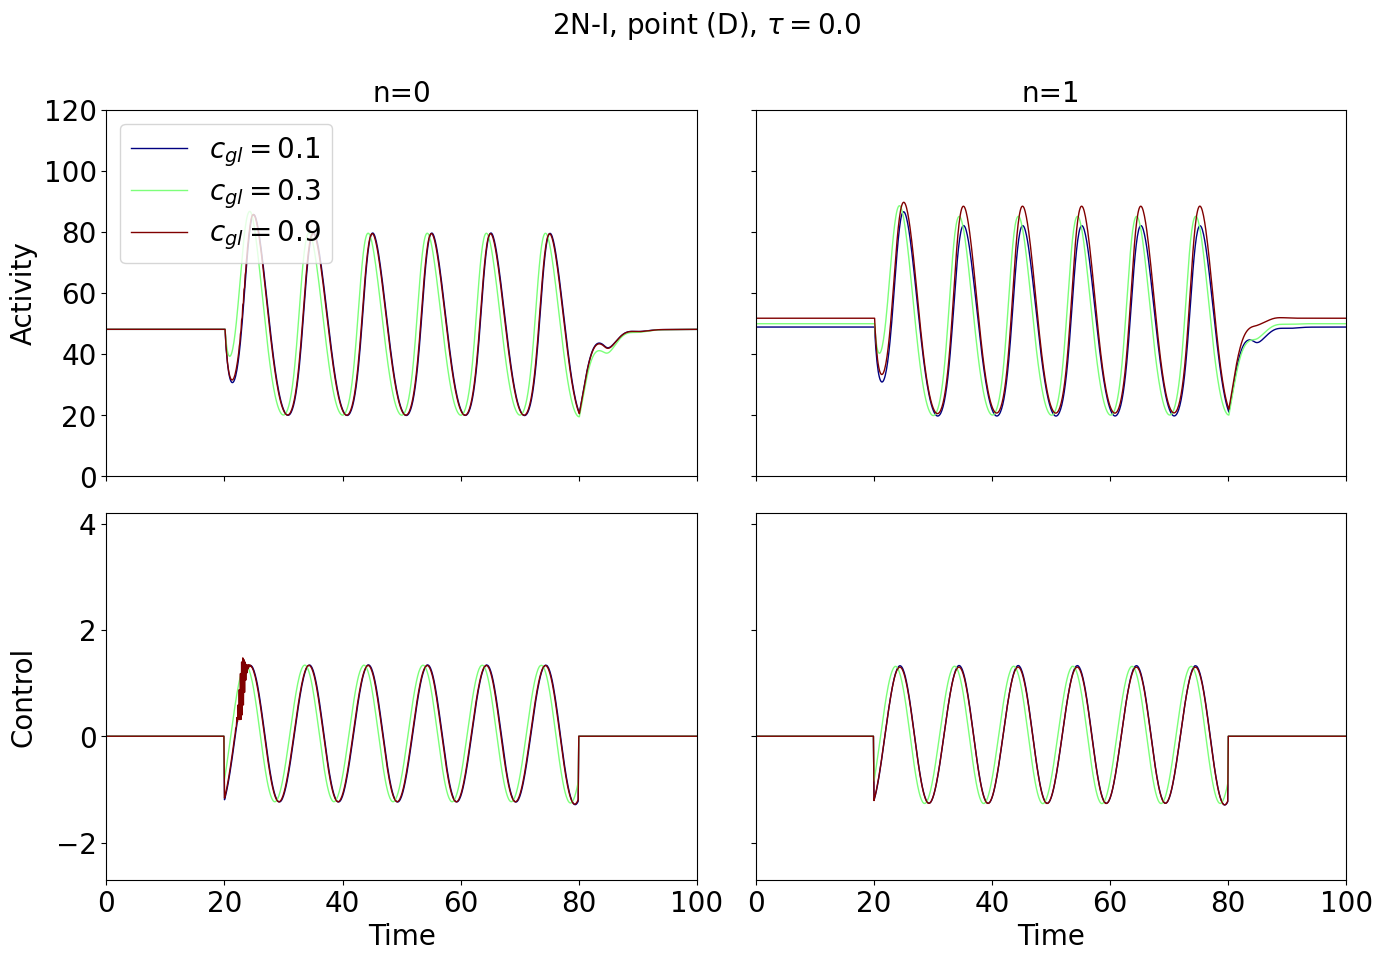

delay  1


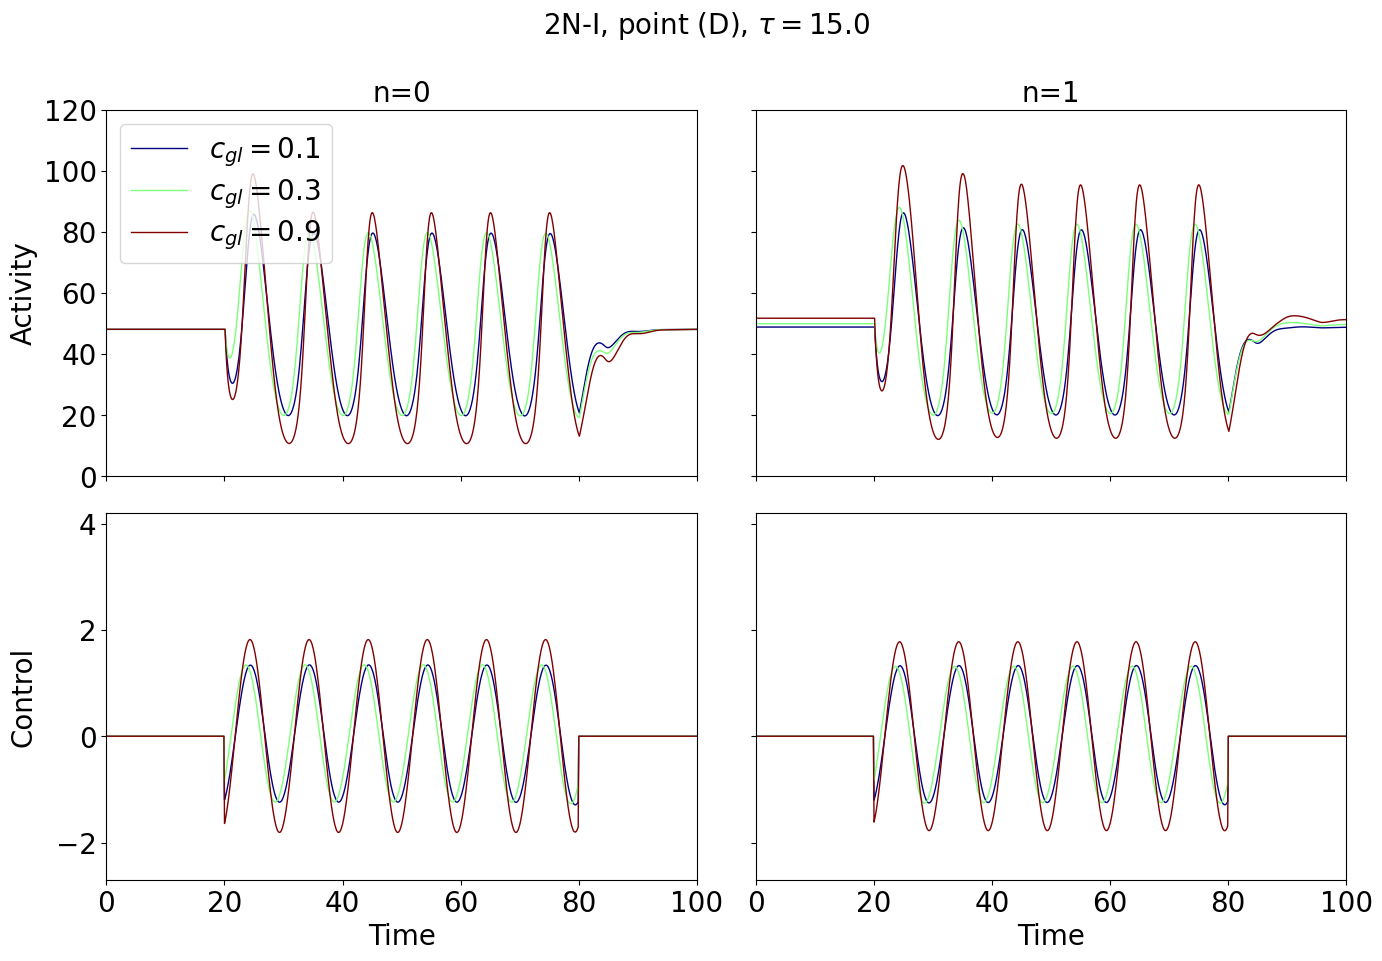

delay  2


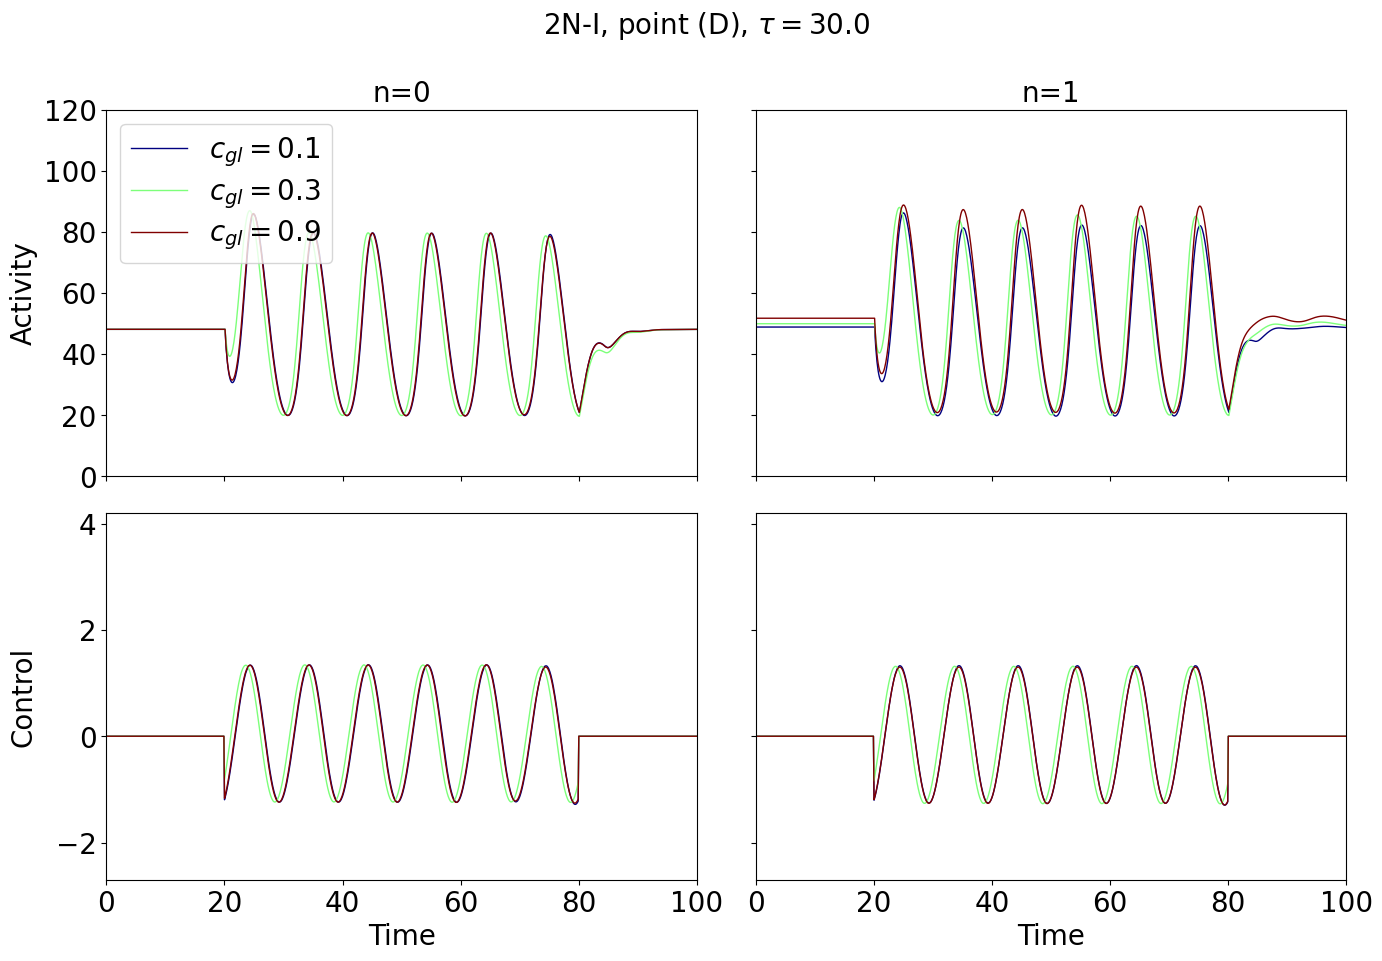

delay  3


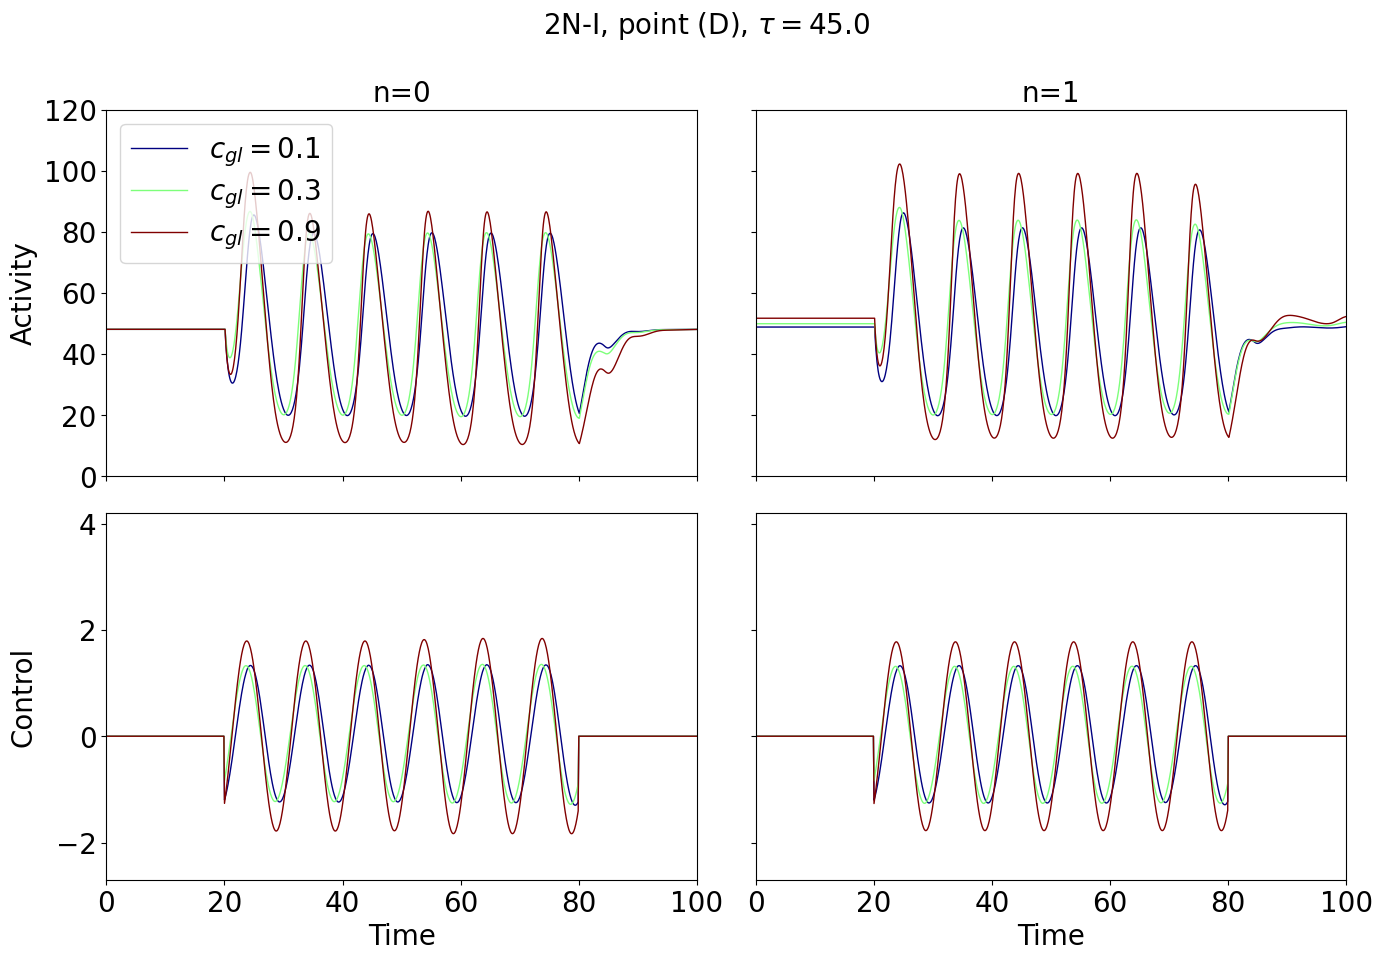

In [23]:
for pi in range(len(p_names)):

    if pi not in [3]: continue

    if pi in [0,1,2,3]:
        duration = 100.
    else:
        duration = 600.

    title = "ALN 2N-I, "
    if pi in [0,1]: title = title + r"down $\rightarrow$ osc"
    elif pi in [2,3]: title = title + r"up $\rightarrow$ osc"
    elif pi in [4,5]: title = title + r"sync osc"
    title = title + ", point (" + str(p_names[pi]) + ")"

    for ci in range(len(coupling_array)):    
        print("coupling ", ci)
        filename = os.path.join(dir, "2N-I_" + p_names[pi] + "_coupling_" + str(ci) + ".png")
        if pi in [0,1,2,3]:
            plot_delay(data[p_names[pi]], duration, dt, ci, 0, filename, title, zoom=False)
        elif pi in [4,5]:
            plot_delay_nodes(data[p_names[pi]], duration, dt, ci, 0, filename, title)

    for di in range(len(delay_array)):
        print("delay ", di)
        filename = os.path.join(dir, "2N-I_" + p_names[pi] + "_delay_" + str(di) + ".png")
        if pi in [0,1,2,3]:
            plot_coupling(data[p_names[pi]], duration, dt, di, 0, filename, title, zoom=False)
        elif pi in [4,5]:
            plot_coupling_nodes(data[p_names[pi]], duration, dt, di, 0, filename, title)


D
coupling  0


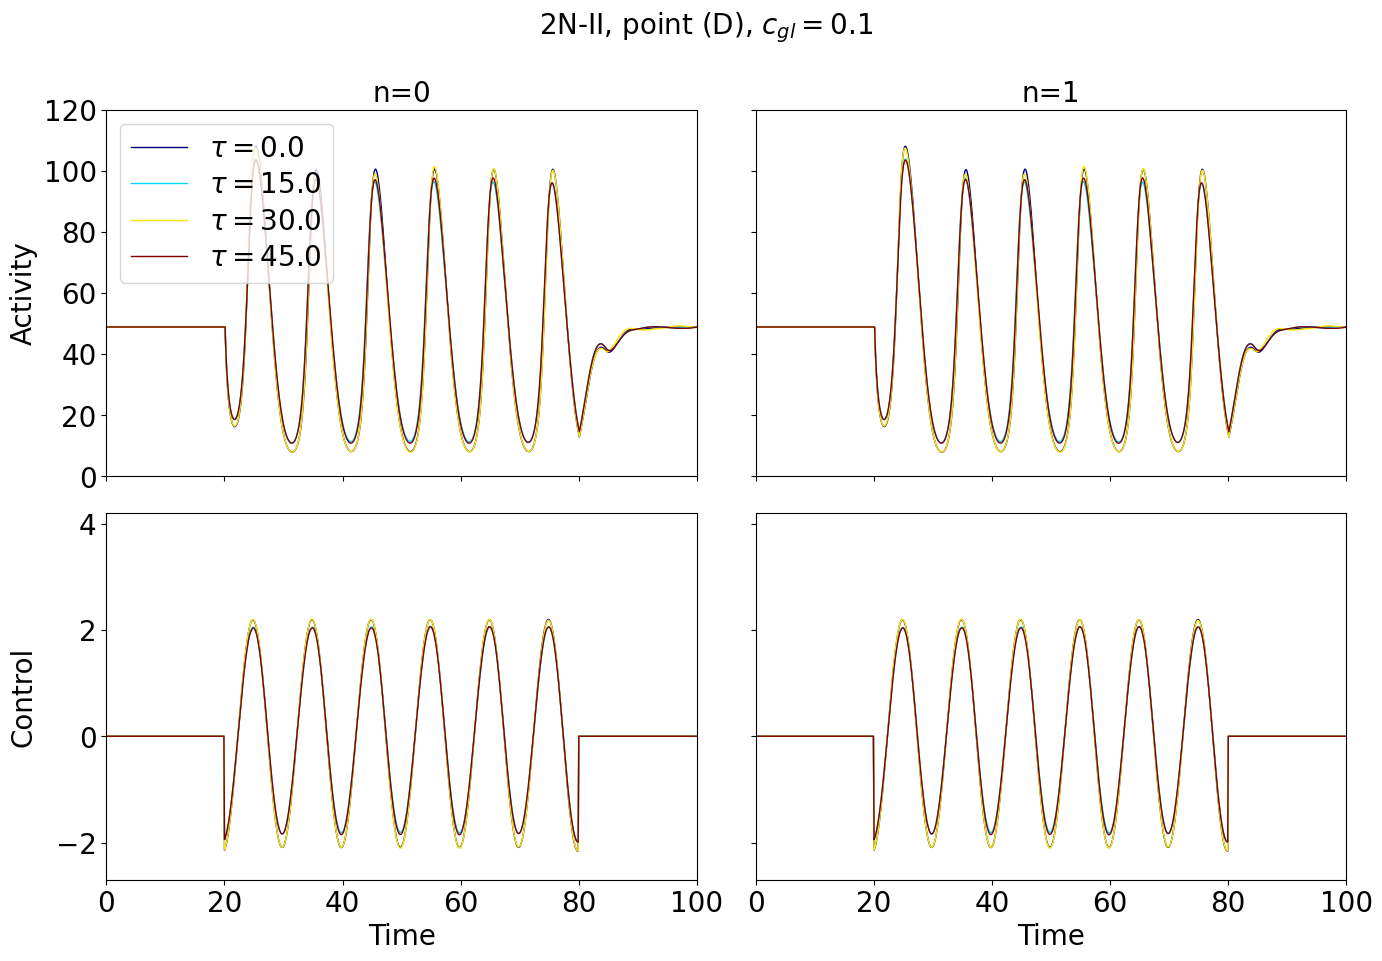

coupling  1


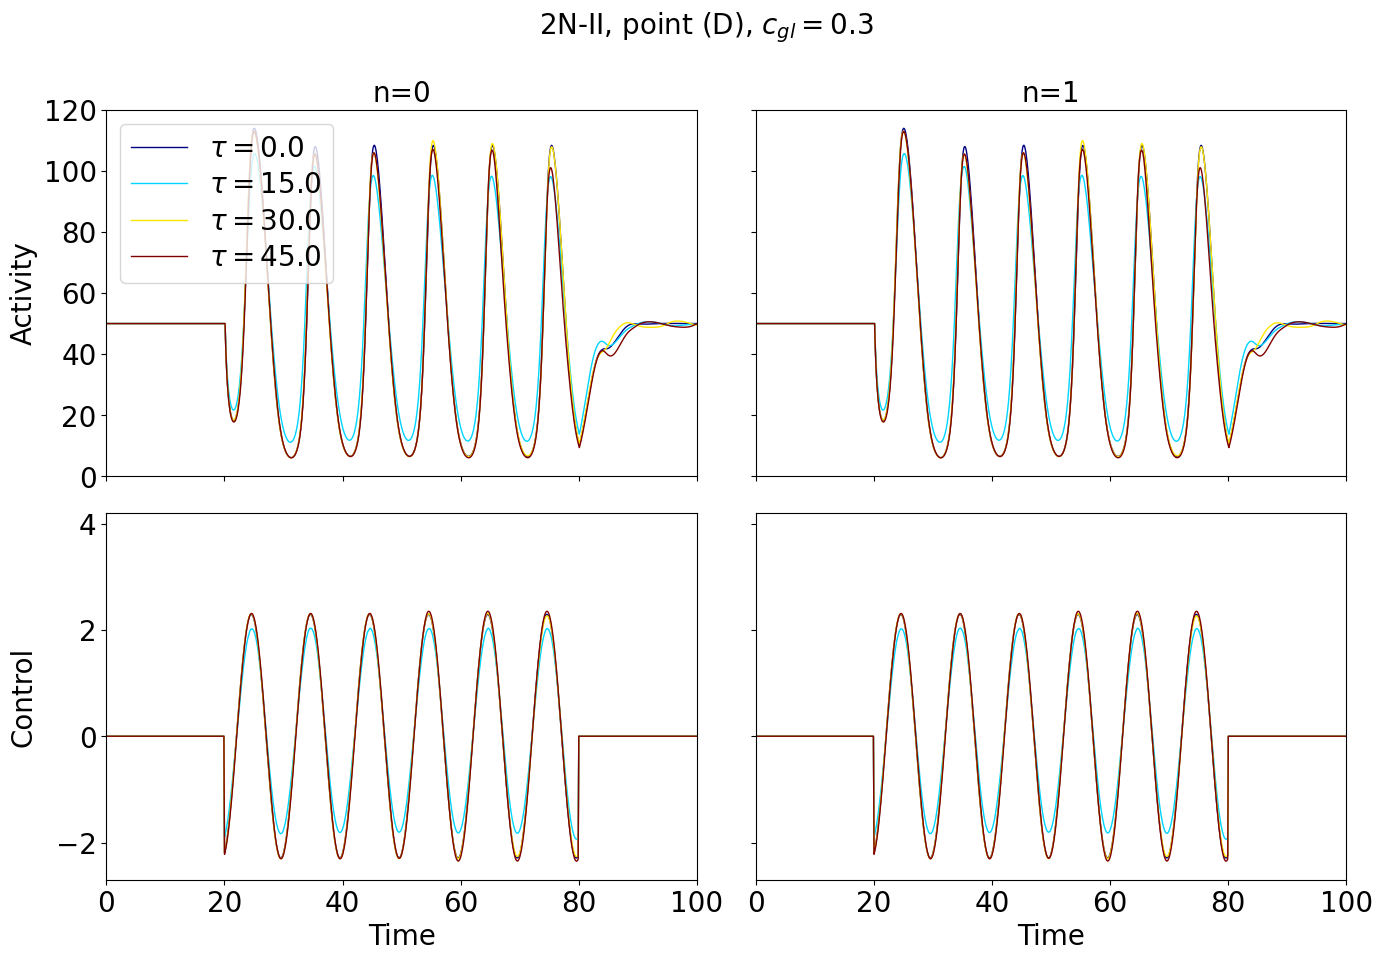

coupling  2


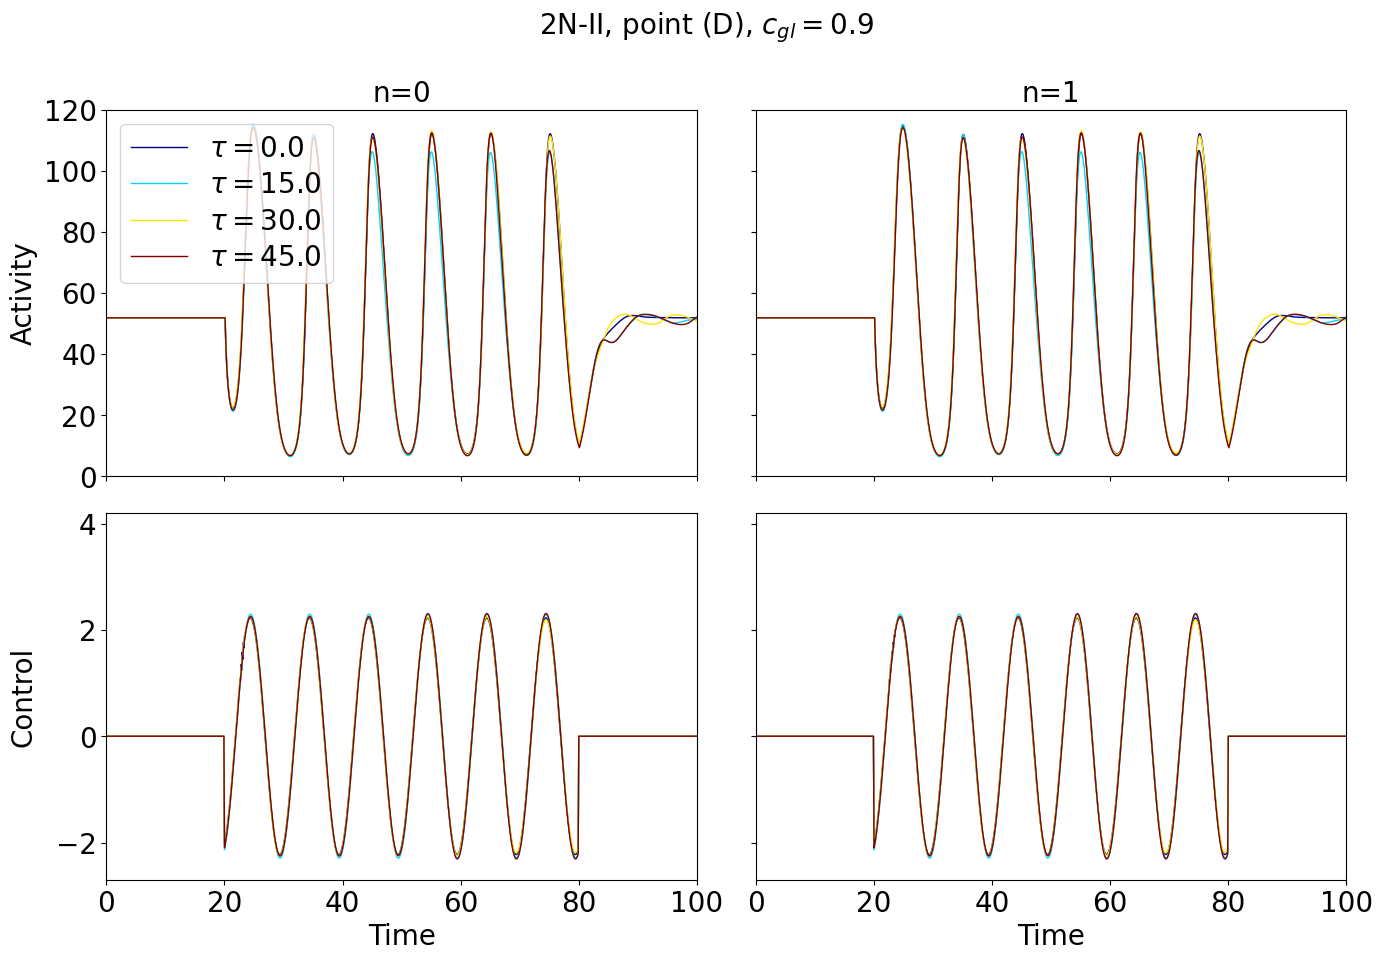

delay  0


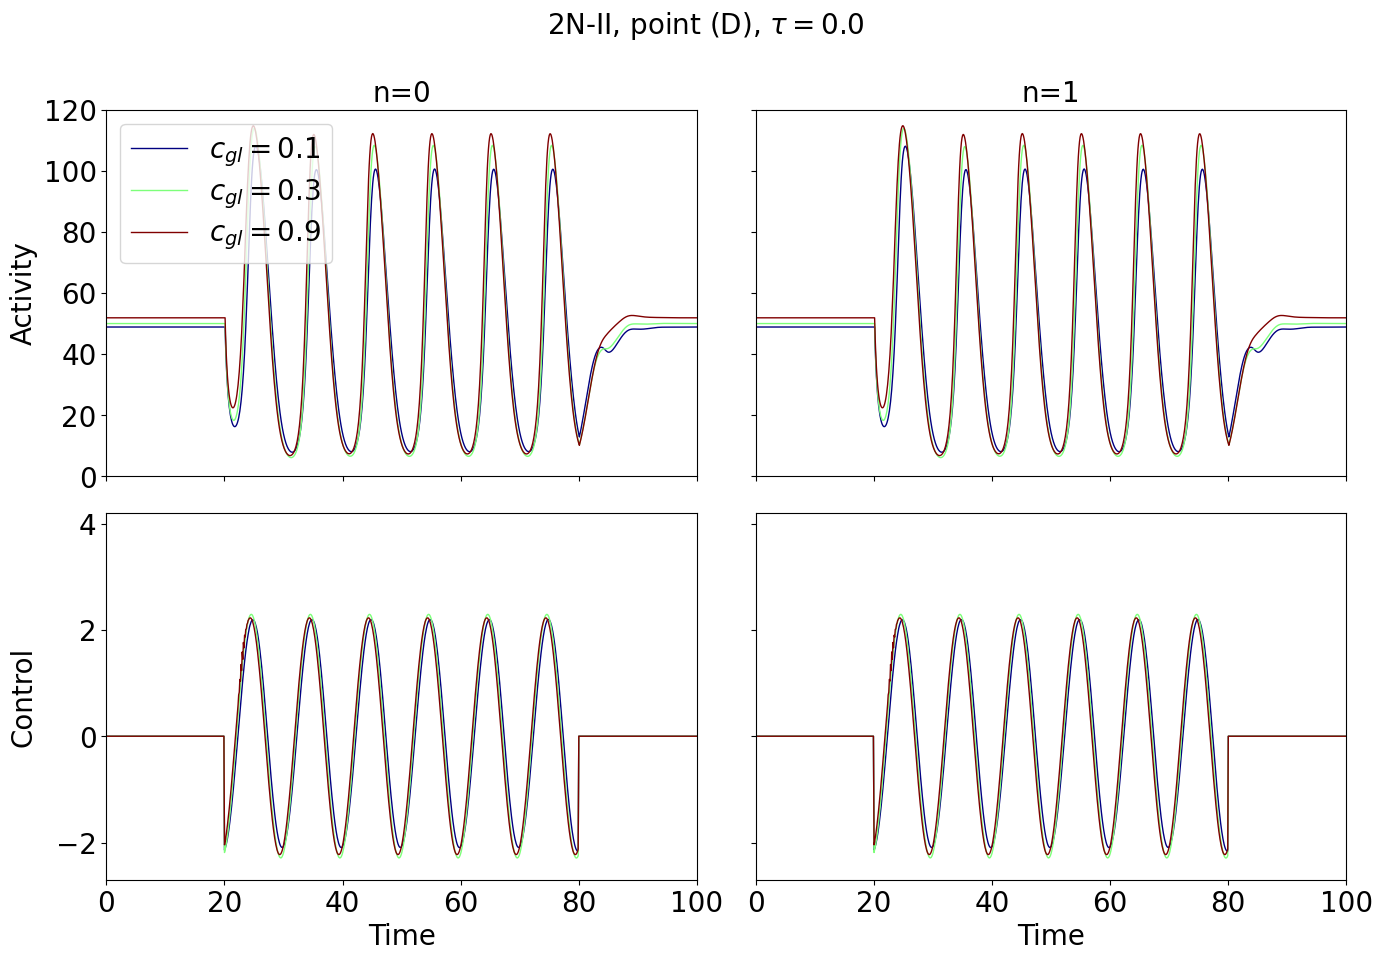

delay  1


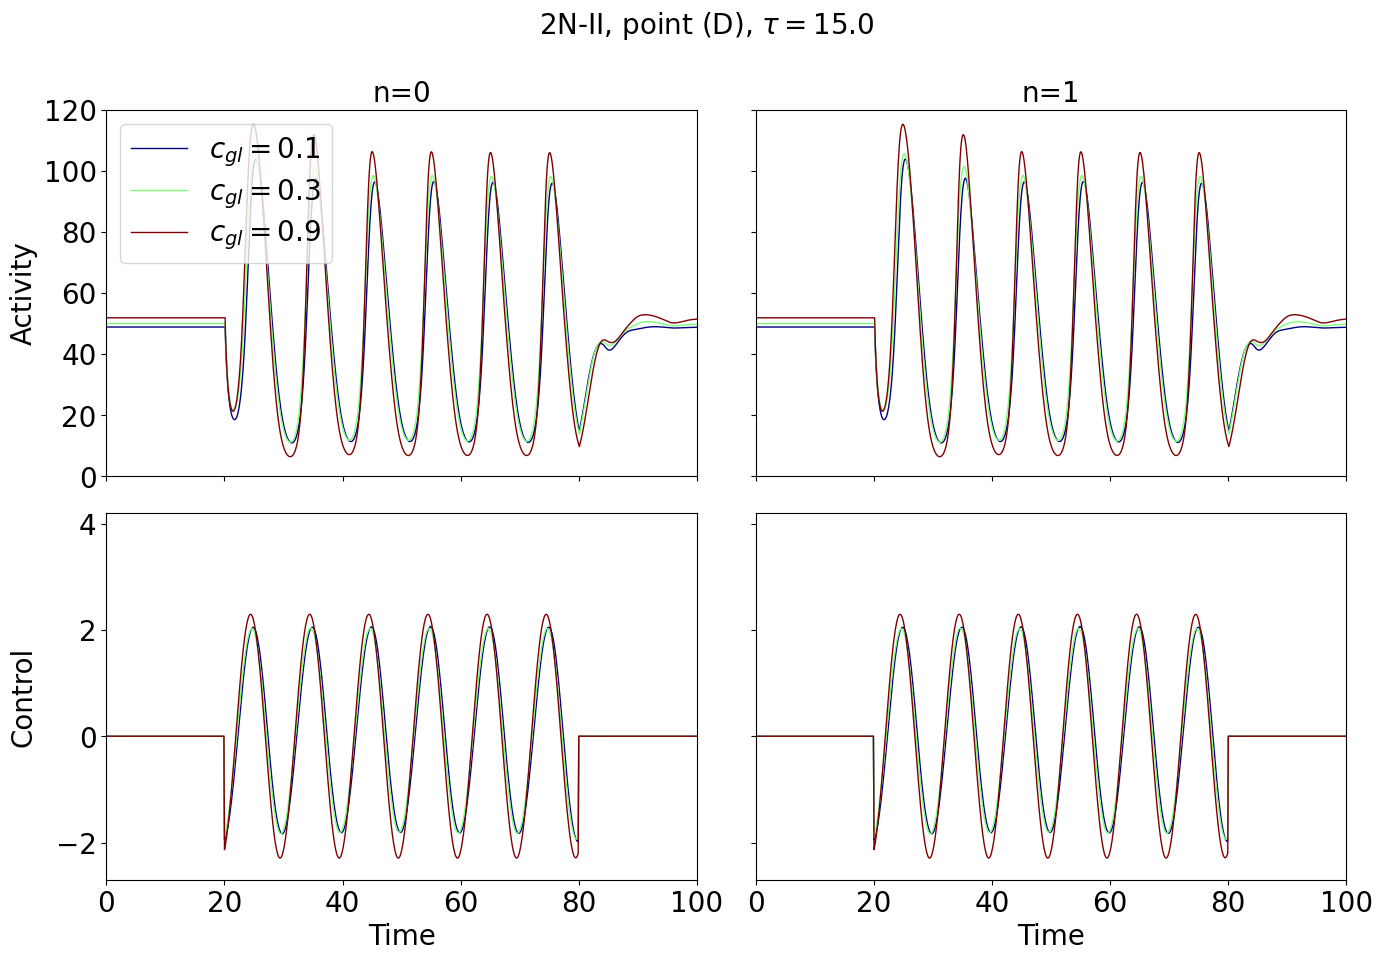

delay  2


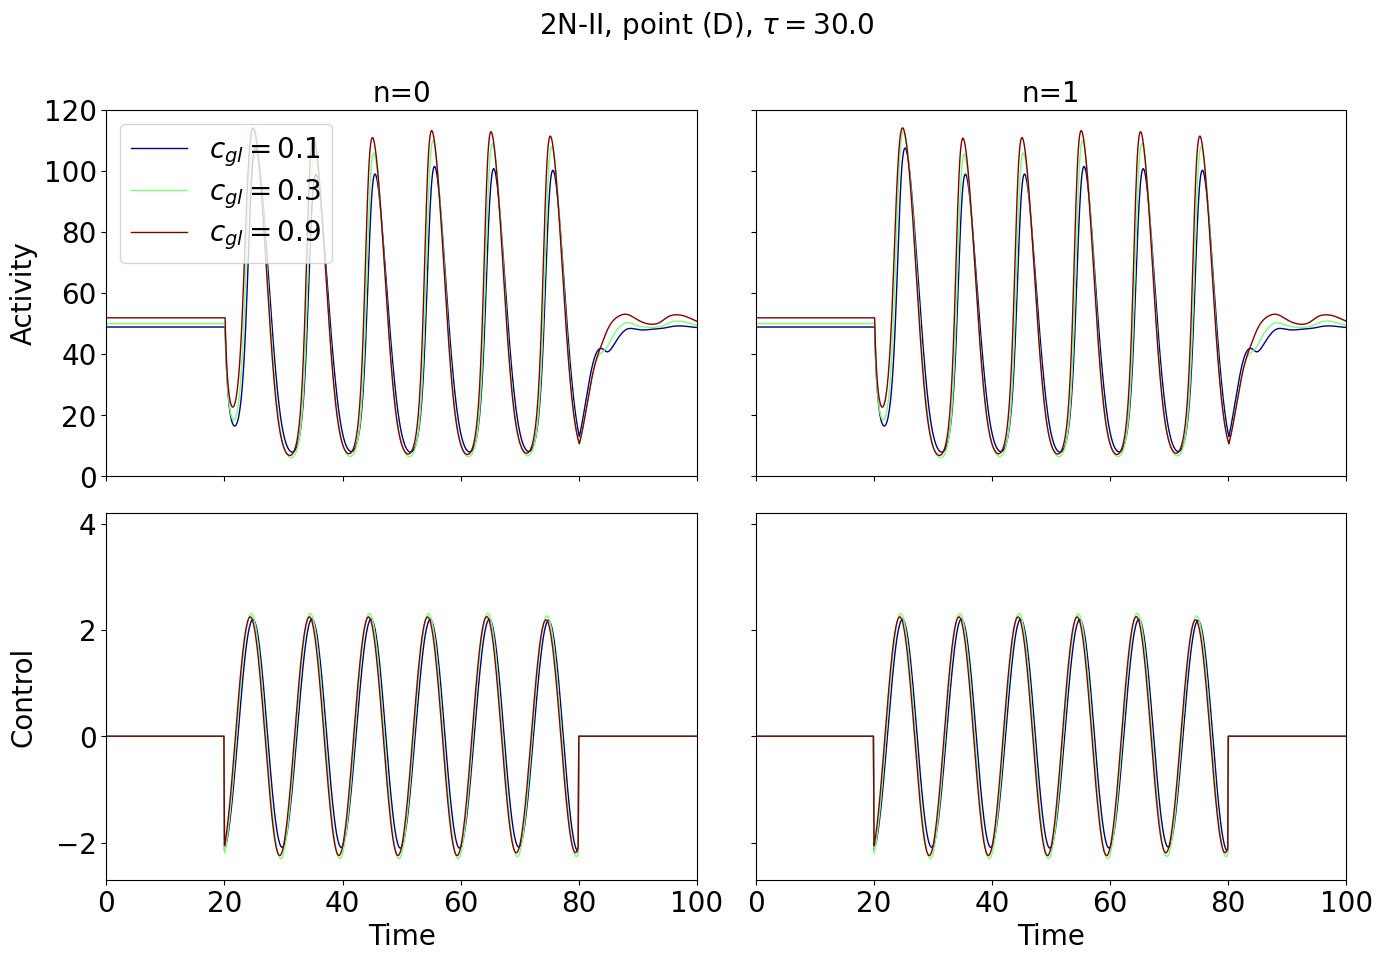

delay  3


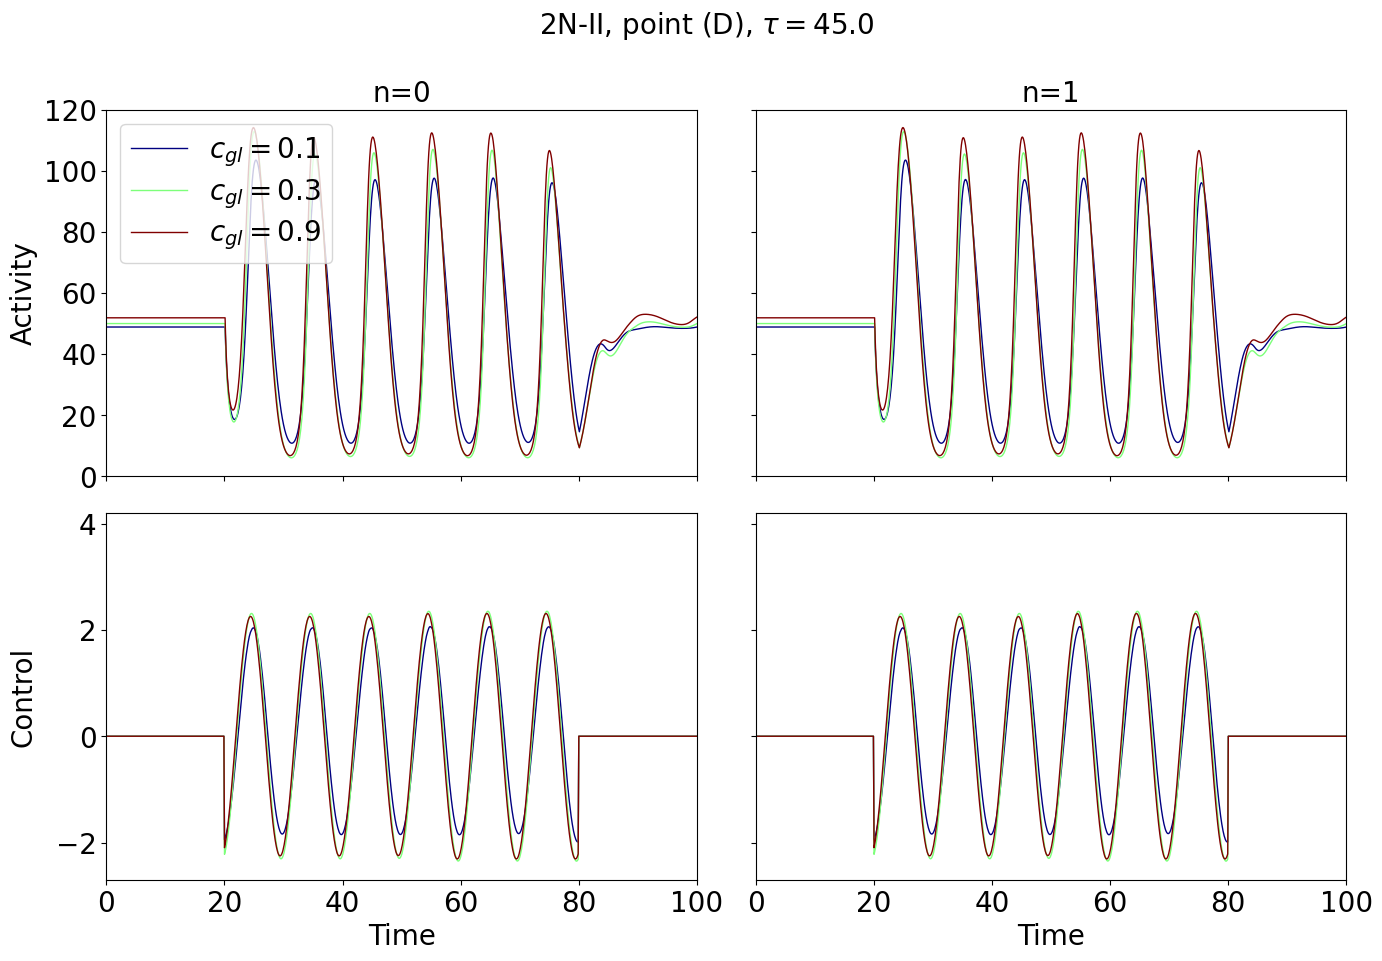

In [24]:
for pi in range(len(p_names)):

    if pi not in [3]: continue

    if pi in [0,1,2,3]:
        duration = 100.
    else:
        duration = 600.

    print(p_names[pi])

    title = "WC 2N-II, "
    if pi in [0,1]: title = title + r"down $\rightarrow$ osc"
    elif pi in [2,3]: title = title + r"up $\rightarrow$ osc"
    elif pi in [4,5]: title = title + r"sync osc"
    title = title + ", point (" + str(p_names[pi]) + ")"

 
    for ci in range(len(coupling_array)):    
        print("coupling ", ci)
        filename = os.path.join(dir, "2N-II_" + p_names[pi] + "_coupling_" + str(ci) + ".png")
        if pi in [0,1,2,3]:
            plot_delay(data[p_names[pi]], duration, dt, ci, 1, filename, title, zoom=False)
        elif pi in [4,5]:
            plot_delay_nodes(data[p_names[pi]], duration, dt, ci, 1, filename, title)

    for di in range(len(delay_array)):

        print("delay ", di)
        filename = os.path.join(dir, "2N-II_" + p_names[pi] + "_delay_" + str(di) + ".png")
        if pi in [0,1,2,3]:
            plot_coupling(data[p_names[pi]], duration, dt, di, 1, filename, title, zoom=False)
        elif pi in [4,5]:
            plot_coupling_nodes(data[p_names[pi]], duration, dt, di, 1, filename, title)

In [4]:
cmap = plt.cm.get_cmap("jet")

ymin, ymax = -2.7, 4.2
rmin, rmax = 0, 120

def plot_delay(data, dur, dt, ci, i, filename, title, zoom=False):
    if zoom:
        fig, ax = plt.subplots(2,4, figsize=(24,10), gridspec_kw={'width_ratios': [3, 2, 3, 2]}, sharex="col", sharey="row")
        ind0, ind1 = 0,2
    else:
        fig, ax = plt.subplots(2,2, figsize=(16,10), sharex="col", sharey="row")
        ind0, ind1 = 0,1
    time_array = np.arange(0, dur+dt, dt)

    for di in range(len(delay_array)):
        if data["state"][i][di][ci] is None:
            continue
        
        c = cmap(di/(len(delay_array)-1))

        ax[0, ind0].plot(time_array, data["state"][i][di][ci][0,0,:], color=c, label=r"$\tau = $" + str(delay_array[di]))
        ax[1, ind0].plot(time_array, data["control"][i][di][ci][0,0,:], color=c)
        ax[0, ind1].plot(time_array, data["state"][i][di][ci][1,0,:], color=c)
        ax[1, ind1].plot(time_array, data["control"][i][di][ci][1,0,:], color=c)

        if zoom:
            mins = scipy.signal.find_peaks(-data["state"][i][di][ci][0,0,:])[0]
            i0, i1 = mins[-3]-10, mins[-2]+10

            time_osc = np.linspace(0, (i1-i0)*dt, i1-i0, endpoint=True)
            #print(i1 - i0)

            ax[0, 1].plot(time_osc, data["state"][i][di][ci][0,0,i0:i1], color=c)
            ax[1, 1].plot(time_osc, data["control"][i][di][ci][0,0,i0:i1], color=c)
            ax[0, 3].plot(time_osc, data["state"][i][di][ci][1,0,i0:i1], color=c)
            ax[1, 3].plot(time_osc, data["control"][i][di][ci][1,0,i0:i1], color=c)

    ax[0,ind0].legend(loc="upper left", labelspacing = 0.3)

    ax[0,ind0].set_xlim(0, duration)
    ax[1,ind0].set_xlim(0, duration)
    ax[0,ind1].set_xlim(0, duration)
    ax[1,ind1].set_xlim(0, duration)

    ax[0,ind0].set_ylim(rmin, rmax)
    ax[0,ind1].set_ylim(rmin, rmax)
    ax[1,ind0].set_ylim(ymin, ymax)
    ax[1,ind1].set_ylim(ymin, ymax)

    ax[1,ind0].set_xlabel("Time")
    ax[1,ind1].set_xlabel("Time")
    ax[0,ind0].set_ylabel(r"Activity")
    ax[1,ind0].set_ylabel(r"Control")

    if zoom:
        ax[0,1].set_xlim(0, (i1-i0)*dt)
        ax[1,1].set_xlim(0, (i1-i0)*dt)
        ax[0,3].set_xlim(0, (i1-i0)*dt)
        ax[1,3].set_xlim(0, (i1-i0)*dt)

    plt.subplots_adjust(
                    wspace=0.1,
                    hspace=0.1)
    
    fig.align_ylabels([ax[:,0]])
    
    title = "2N-I"
    if i == 1:
        title = title + "I"
    title = title + ", point (" + filename[-16] + r"), $c_{gl} = $" + str(coupling_array[ci])
    fig.suptitle(title)

    ax[0,ind0].set_title("n=0")
    ax[0,ind1].set_title("n=1")

    plt.savefig(filename, bbox_inches='tight', dpi=200)
    plt.show()
    return

def plot_coupling(data, dur, dt, di, i, filename, title, zoom=False):
    if zoom:
        fig, ax = plt.subplots(2,4, figsize=(24,10), gridspec_kw={'width_ratios': [3, 2, 3, 2]}, sharex="col", sharey="row")
        ind0, ind1 = 0,2
    else:
        fig, ax = plt.subplots(2,2, figsize=(16,10), sharex="col", sharey="row")
        ind0, ind1 = 0,1
    time_array = np.arange(0, dur+dt, dt)

    for ci in range(len(coupling_array)):

        if data["state"][i][di][ci] is None:
            continue

        c = cmap(ci/(len(coupling_array)-1))

        ax[0, ind0].plot(time_array, data["state"][i][di][ci][0,0,:], color=c, label=r"$c_{gl} = $" + str(coupling_array[ci]))
        ax[1, ind0].plot(time_array, data["control"][i][di][ci][0,0,:], color=c)
        ax[0, ind1].plot(time_array, data["state"][i][di][ci][1,0,:], color=c)
        ax[1, ind1].plot(time_array, data["control"][i][di][ci][1,0,:], color=c)

        if zoom:
            mins = scipy.signal.find_peaks(-data["state"][i][di][ci][0,0,:])[0]
            i0, i1 = mins[-3]-10, mins[-2]+10

            time_osc = np.linspace(0, (i1-i0)*dt, i1-i0, endpoint=True)
            #print(i1 - i0)

            ax[0, 1].plot(time_osc, data["state"][i][di][ci][0,0,i0:i1], color=c)
            ax[1, 1].plot(time_osc, data["control"][i][di][ci][0,0,i0:i1], color=c)
            ax[0, 3].plot(time_osc, data["state"][i][di][ci][1,0,i0:i1], color=c)
            ax[1, 3].plot(time_osc, data["control"][i][di][ci][1,0,i0:i1], color=c)

    ax[0,ind0].legend(loc="upper left", labelspacing = 0.3)

    ax[0,ind0].set_xlim(0, duration)
    ax[1,ind0].set_xlim(0, duration)
    ax[0,ind1].set_xlim(0, duration)
    ax[1,ind1].set_xlim(0, duration)

    ax[0,ind0].set_ylim(rmin, rmax)
    ax[0,ind1].set_ylim(rmin, rmax)
    ax[1,ind0].set_ylim(ymin, ymax)
    ax[1,ind1].set_ylim(ymin, ymax)

    ax[1,ind0].set_xlabel("Time")
    ax[1,ind1].set_xlabel("Time")
    ax[0,ind0].set_ylabel("Activity")
    ax[1,ind0].set_ylabel("Control")

    if zoom:
        ax[0,1].set_xlim(0, (i1-i0)*dt)
        ax[1,1].set_xlim(0, (i1-i0)*dt)
        ax[0,3].set_xlim(0, (i1-i0)*dt)
        ax[1,3].set_xlim(0, (i1-i0)*dt)

    plt.subplots_adjust(
                    wspace=0.1,
                    hspace=0.1)
    
    fig.align_ylabels([ax[:,0]])
    
    title = "2N-I"
    if i == 1:
        title = title + "I"
    title = title + ", point (" + filename[-13] + r"), $\tau = $" + str(delay_array[di])
    fig.suptitle(title)

    ax[0,ind0].set_title("n=0")
    ax[0,ind1].set_title("n=1")

    plt.savefig(filename, bbox_inches='tight', dpi=200)
    plt.show()
    return

def plot_coupling_nodes(data, dur, dt, di, i, filename, title):
    fig, ax = plt.subplots(2,len(coupling_array), figsize=(20,8), sharex=True, sharey="row")
    time_array = np.arange(0, dur+dt, dt)

    for ci in range(len(coupling_array)):
        if data["state"][i][di][ci] is None:
            continue

        c = cmap(ci/(len(coupling_array)-1))

        ax[0, ci].set_title(r"$c_{gl} = $" + str(coupling_array[ci]))

        ax[0,ci].plot(time_array, data["state"][i][di][ci][0,0,:], color=c, label="N0")
        ax[0,ci].plot(time_array, data["state"][i][di][ci][1,0,:], color=c, linestyle=":", label="N1")
        ax[1,ci].plot(time_array, data["control"][i][di][ci][0,0,:], color=c)
        ax[1,ci].plot(time_array, data["control"][i][di][ci][1,0,:], color=c, linestyle=":")

        ax[1,ci].set_xlabel("Time")

    ax[0,0].legend(loc="upper left", labelspacing = 0.1, handletextpad=0.2, handlelength=2, borderaxespad=0.3, borderpad=0.2)
    ax[0,0].set_xlim(0, duration)
    ax[0,0].set_ylabel("Activity")
    ax[1,0].set_ylabel("Control")

    plt.subplots_adjust( wspace=0.2, hspace=0.1)
    fig.align_ylabels([ax[:,0]])
    fig.suptitle(title + r", delay $\tau = $" + str(delay_array[di]))

    plt.savefig(filename, bbox_inches='tight', dpi=200)
    plt.show()
    return

def plot_delay_nodes(data, dur, dt, ci, i, filename, title):
    fig, ax = plt.subplots(2,len(delay_array), figsize=(20,8), sharex=True, sharey="row")
    time_array = np.arange(0, dur+dt, dt)

    for di in range(len(delay_array)):
        if data["state"][i][di][ci] is None:
            continue

        c = cmap(di/(len(delay_array)-1))

        ax[0,di].set_title(r"$\tau = $" + str(delay_array[di]))

        ax[0,di].plot(time_array, data["state"][i][di][ci][0,0,:], color=c, label="N0")
        ax[0,di].plot(time_array, data["state"][i][di][ci][1,0,:], color=c, linestyle=":", label="N1")
        ax[1,di].plot(time_array, data["control"][i][di][ci][0,0,:], color=c)
        ax[1,di].plot(time_array, data["control"][i][di][ci][1,0,:], color=c, linestyle=":")

        ax[1,di].set_xlabel("Time")

    ax[0,0].legend(loc="upper left", labelspacing = 0.1, handletextpad=0.2, handlelength=2, borderaxespad=0.3, borderpad=0.2)
    ax[0,0].set_xlim(0, duration)
    ax[0,0].set_ylabel("Activity")
    ax[1,0].set_ylabel("Control")

    plt.subplots_adjust( wspace=0.2, hspace=0.1)
    fig.align_ylabels([ax[:,0]])
    fig.suptitle(title + r", coupling strength $c_{gl} = $" + str(coupling_array[ci]))

    plt.savefig(filename, bbox_inches='tight', dpi=200)
    plt.show()
    return

In [28]:
with open(os.path.join(pickledir, 'osc_2n_aln_w1D.pickle'), 'wb') as f:
    pickle.dump(data, f)

In [5]:
with open(os.path.join(pickledir, 'osc_2n_aln_w1D.pickle'), 'rb') as f:
    res_read = pickle.load(f)
    print(res_read.keys() )

data = res_read.copy()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F'])
